In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mayavi import mlab
mlab.init_notebook()

In [2]:
def simpleMap(tau, p):
    gamma = 10**(p[2]*np.tanh(np.log10(tau)/p[3]))
    newTau = p[0]*np.exp(-p[1]/((1 + 1/gamma + (1 - 1/gamma)*np.exp(-gamma*tau)))**(1/4))
    return newTau

In [3]:
def nDeriv(f, x, args):
    delta = f(x+0.00001, args) - f(x, args)
    return delta/0.00001

In [4]:
def lyapunovExp(f, x0, args):
    lyExp = 0
    x = x0
    for i in range(500):
        lyExp += np.log(np.abs(nDeriv(f,x,args)))
        x = f(x,args)
    lyExp /= 500
    return lyExp

In [13]:
massLossArr = [0]
c2 = 38
c1 = np.exp(31)
c3a = 1
c3b = 0.7

for i in range(500):
    massLossArr.append(simpleMap(massLossArr[i],[c1,c2,c3a,c3b]))
    
    


/tmp/ipykernel_193/1463387648.py:2: RuntimeWarning: divide by zero encountered in log10
  gamma = 10**(p[2]*np.tanh(np.log10(tau)/p[3]))


In [14]:
bins = np.zeros(100)
maxVal = np.max(massLossArr)
for massLoss in massLossArr[10:]:
    index = massLoss/maxVal
    index = ((int)(index*100))-1
    bins[index] += 1

binCount = 0
for group in bins:
    if group > 0:
        binCount += 1

if binCount > 50:
    print("Chaotic")
else:
    print("Periodic")
    
print(binCount)

Periodic
22


In [5]:
p3s = np.linspace(0.1,2)
#p4s = np.linspace(0.1,2)
p4 = 0.5
p1s = np.logspace(-1,1)
p2s = np.linspace(20,40)

chaoticP3 = []
chaoticP1 = []
chaoticP2 = []
chaoticP4 = []
chaocicity = []
lyapunovExponent = []


for p2 in p2s:
    for p3 in p3s:
        for p1 in p1s:
            massLossArr = [0]
            d = p1*np.exp(p2*2**(-0.25))
            '''
            for i in range(600):
                massLossArr.append(simpleMap(massLossArr[i],[d,p2,p3,p4]))
            bins = np.zeros(100)
            maxVal = np.max(massLossArr)
            for massLoss in massLossArr[50:]:
                index = massLoss/maxVal
                index = ((int)(index*100))-1
                bins[index] += 1

            binCount = 0
            for group in bins:
                if group > 0:
                    binCount += 1

            
            if binCount > 50:
                binCount = 50
                chaoticP2.append(p2)
                chaoticP3.append(p3)
                chaoticP1.append(p1)
                chaoticP4.append(p4)
            chaocicity.append(binCount)
            '''
            lyExp = lyapunovExp(simpleMap, 0, [d,p2,p3,p4])
            if  lyExp > 0:
                chaoticP2.append(p2)
                chaoticP3.append(p3)
                chaoticP1.append(p1)
                chaoticP4.append(p4)
                lyapunovExponent.append(lyExp)
            


/tmp/ipykernel_49/1463387648.py:2: RuntimeWarning: divide by zero encountered in log10
  gamma = 10**(p[2]*np.tanh(np.log10(tau)/p[3]))


In [6]:
chaoticP1, chaoticP2, chaoticP3, lyapunovExponent = np.loadtxt("chaoticPoints.txt", delimiter = ',', unpack = True)


In [ ]:
s = mlab.points3d(chaoticP1, chaoticP2, chaoticP3)


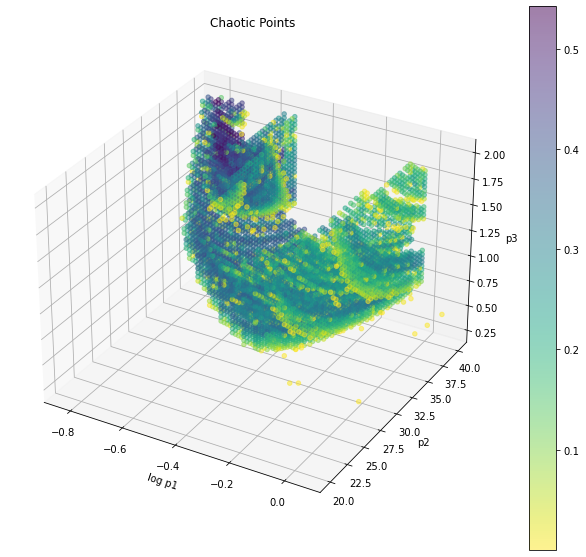

In [7]:
fig = plt.figure(figsize = (11,10))
ax = fig.add_subplot(projection = '3d')
logChaoticP1 = np.log10(chaoticP1)
scatt = ax.scatter3D(logChaoticP1, chaoticP2, chaoticP3, c = lyapunovExponent, alpha = 0.5, cmap = 'viridis_r')
#ax.scatter(logChaoticC1, chaoticC2, chaoticC3)
ax.set_xlabel("log p1")
ax.set_ylabel("p2")
ax.set_zlabel("p3")
ax.set_title("Chaotic Points")
ax.view_init(30,-60)
fig.colorbar(scatt)
plt.show()

In [12]:
print(len(chaoticP1))

9088


In [19]:
file = open("chaoticPoints.txt", "w")
for i in range(len(chaoticP1)):
    text = "{0}, {1}, {2}, {3:.5f} \n"
    file.write(text.format(chaoticP1[i],chaoticP2[i],chaoticP3[i],lyapunovExponent[i]))
file.close()

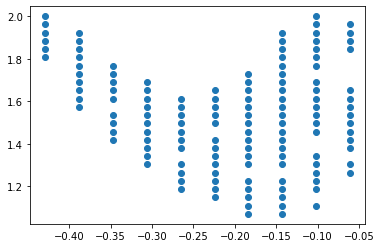

In [17]:
fixedP2 = 22.040816
p3Arr = []
p1Arr = []
for i in range(len(chaoticP1)):
    if np.abs(chaoticP2[i] -fixedP2) < 0.0001:
        p3Arr.append(chaoticP3[i])
        p1Arr.append(logChaoticP1[i])
    
fig, ax = plt.subplots(1,1)
ax.scatter(p1Arr,p3Arr)
plt.show()
